# Real-World Style Fitness Classification 

*This synthetic dataset simulates a real-world binary classification problem where the goal is to predict whether a person is fit (is_fit = 1) or not fit (is_fit = 0) based on various health and lifestyle features.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fitness_dataset.csv')
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


### Data Overview

In [3]:
df.shape

(2000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [5]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


In [6]:
df.describe(include='O')

,smokes,gender
count,2000,2000
unique,4,2
top,yes,F
freq,711,1030


### Handling Missing Values

In [7]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [8]:
df['sleep_hours'].std()

np.float64(1.502031210766019)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

### EDA

In [10]:
cat_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
print('Categorical Columns are:', cat_col)

Categorical Columns are: ['smokes', 'gender']


In [11]:
df['gender'].value_counts()

gender
F    1030
M     970
Name: count, dtype: int64

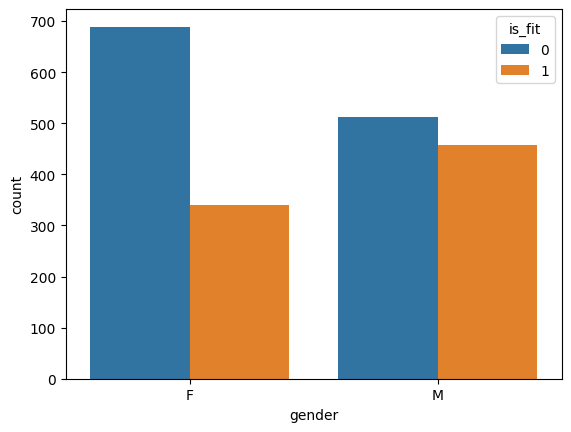

In [12]:
sns.countplot(x='gender', data=df, hue = "is_fit")
plt.show()

In [13]:
df['smokes'].value_counts()

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

In [14]:
smoke_map = {'yes':1, 'no':0,'1':1,'0':0}
df['smokes'] = df['smokes'].replace({'yes':'1', 'no':'0'})

In [15]:
df['smokes'].value_counts()

smokes
0    1099
1     901
Name: count, dtype: int64

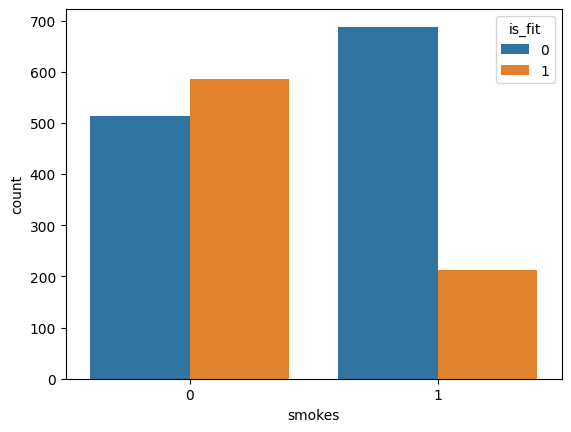

In [16]:
sns.countplot(x='smokes', data=df, hue = "is_fit")
plt.show()

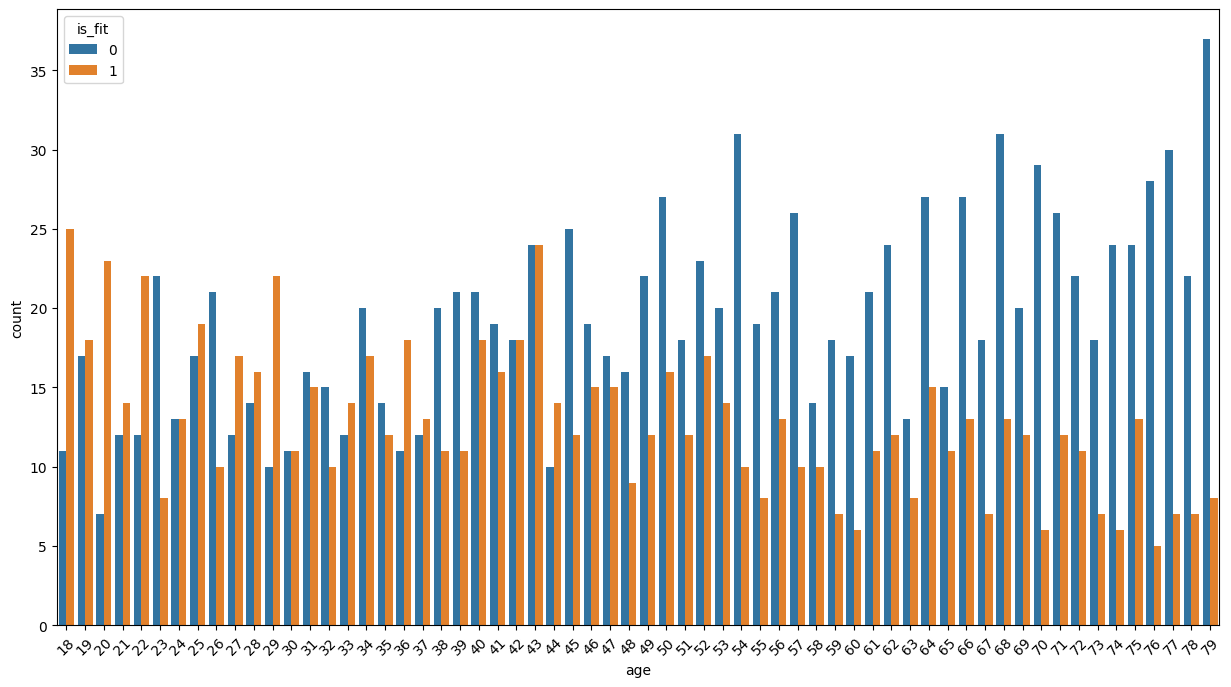

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'age',data=df,hue = "is_fit")
plt.xticks(rotation = 45)
plt.show()

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols_nonbinary = [c for c in num_cols if df[c].nunique() > 2]

In [19]:
num_cols_nonbinary

['age',
 'height_cm',
 'weight_kg',
 'heart_rate',
 'blood_pressure',
 'sleep_hours',
 'nutrition_quality',
 'activity_index']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

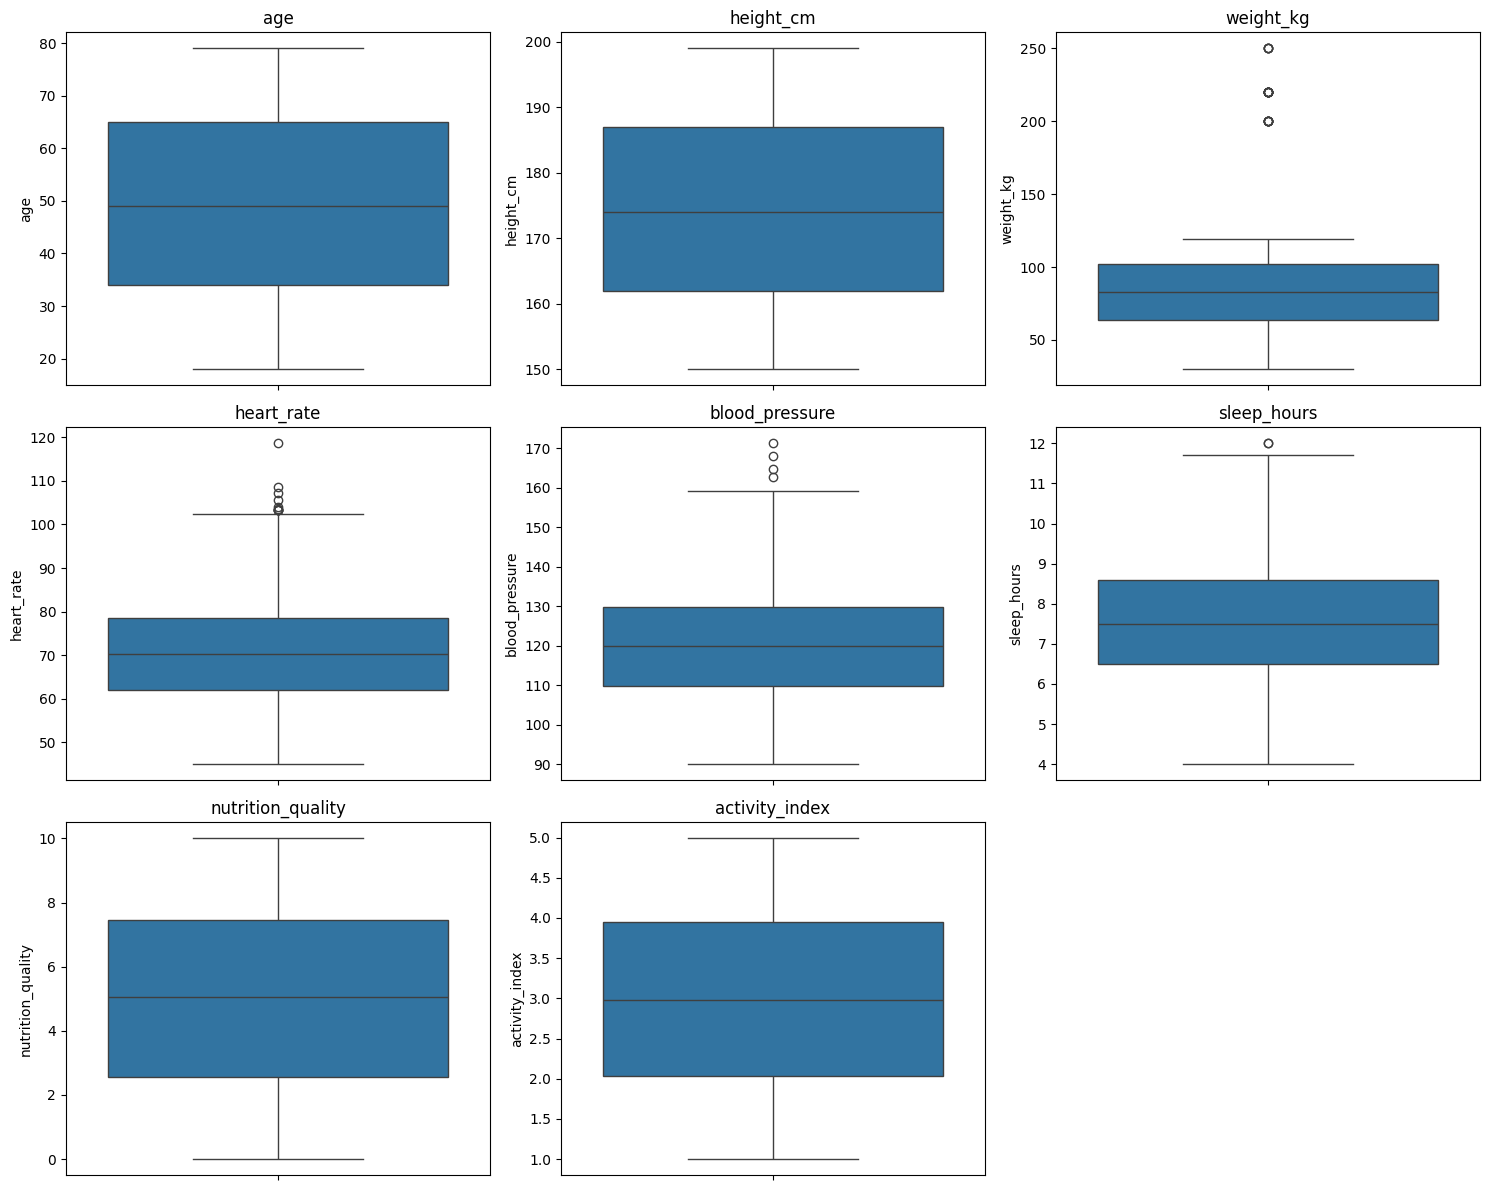

In [21]:
n = len(num_cols_nonbinary)

cols = 3
rows = rows = (n + cols - 1) // cols
plt.figure(figsize=(cols * 5, rows * 4))

for i,col in enumerate(num_cols_nonbinary,1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Checking Outliers

In [22]:
outlier_summary = []
for c in num_cols_nonbinary:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    count = ((df[c] < lower) | (df[c] > upper)).sum()
    outlier_summary.append((c, count, f"{count/len(df):.2%}"))

print("\nIQR-based outlier summary:")
for col, cnt, pct in outlier_summary:
    print(f"{col}: {cnt} rows ({pct})") 


IQR-based outlier summary:
age: 0 rows (0.00%)
height_cm: 0 rows (0.00%)
weight_kg: 21 rows (1.05%)
heart_rate: 10 rows (0.50%)
blood_pressure: 4 rows (0.20%)
sleep_hours: 2 rows (0.10%)
nutrition_quality: 0 rows (0.00%)
activity_index: 0 rows (0.00%)


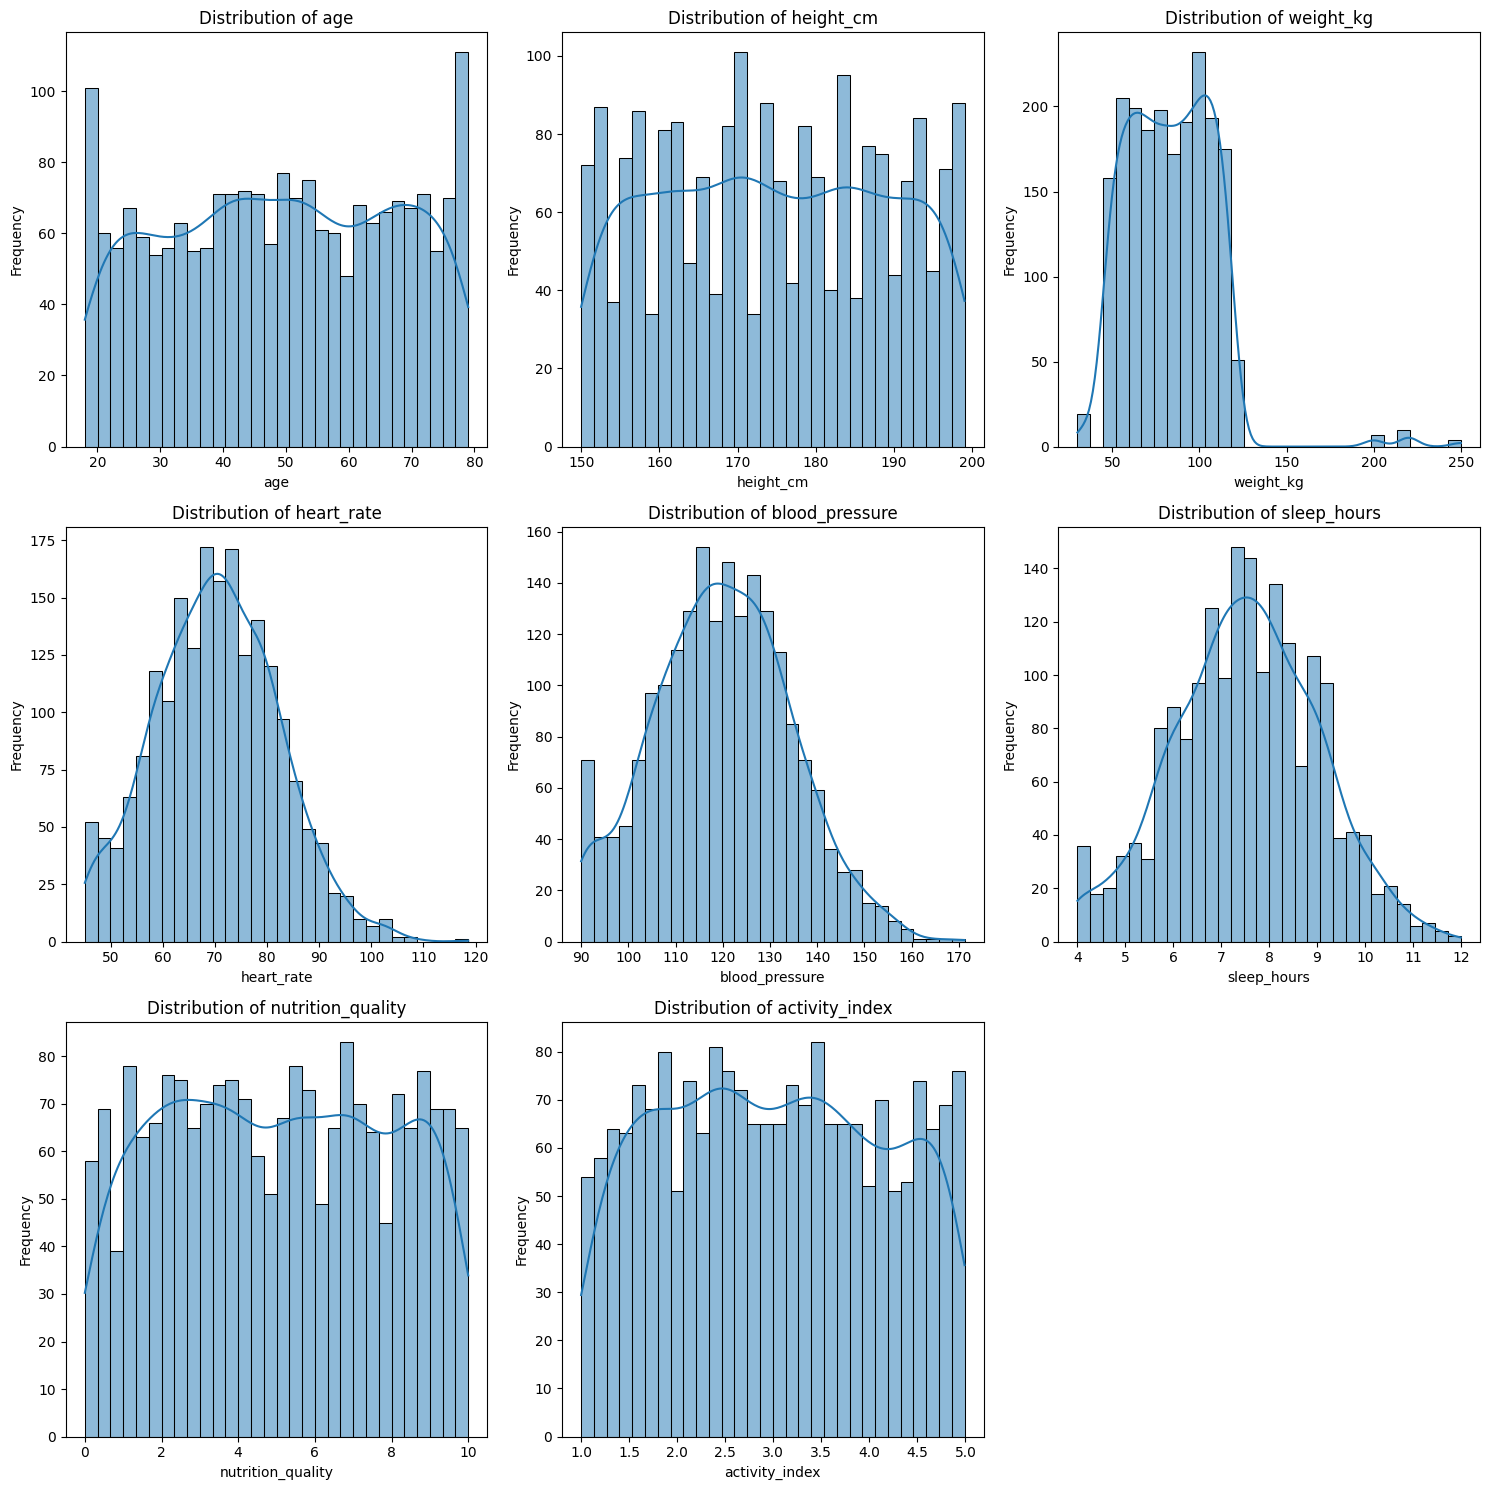

Skewness scores of all non-binary numerical columns:
age: -0.04
height_cm: 0.01
weight_kg: 1.43
heart_rate: 0.15
blood_pressure: 0.10
sleep_hours: -0.02
nutrition_quality: 0.01
activity_index: 0.04


In [23]:
n = len(num_cols_nonbinary)
rows = (n + 2) // 3   
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(num_cols_nonbinary, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Skewness scores of all non-binary numerical columns:")
for col in num_cols_nonbinary:
    print(f"{col}: {df[col].skew():.2f}")

#### Log Transforming Weight column for reducing skewness

In [24]:
from sklearn.preprocessing import FunctionTransformer

weight_transformer = Pipeline([
    ('log1p', FunctionTransformer(np.log1p, validate=False))
])

<Axes: xlabel='weight_kg', ylabel='Count'>

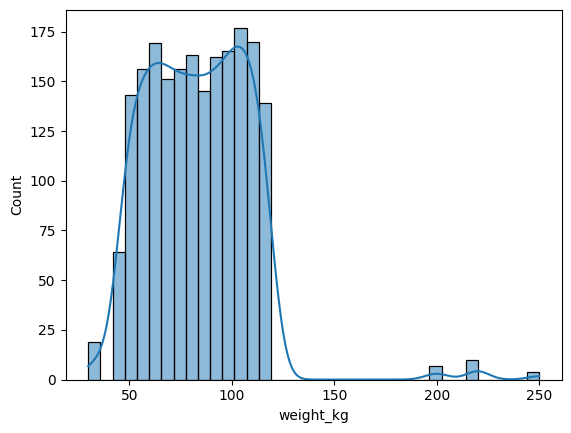

In [25]:
sns.histplot(df['weight_kg'],kde=True)

In [26]:
weight_transformed = weight_transformer.fit_transform(df['weight_kg'])

<Axes: xlabel='weight_kg', ylabel='Count'>

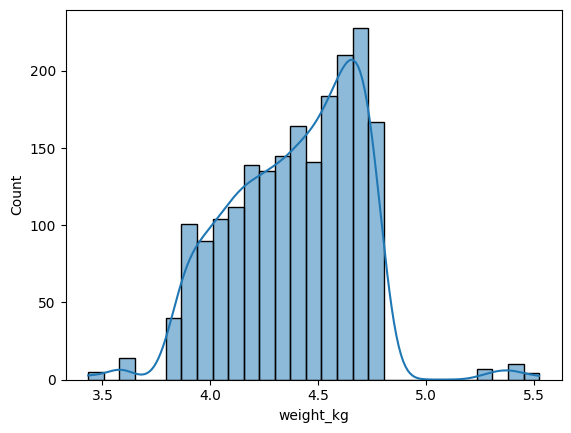

In [27]:
sns.histplot(weight_transformed,kde=True)

### Train Test Splitting

In [28]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fit', axis=1)
y = df['is_fit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline Building

#### Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [
     'age',
     'height_cm',
     'weight_kg',
     'heart_rate',
     'blood_pressure',
     'sleep_hours',
     'nutrition_quality',
     'activity_index' 
] 
categorical_features = ['smokes', 'gender']

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [31]:
#Preprocessing
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("weight", weight_transformer, ["weight_kg"]),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#### Logistic Regression Model

In [32]:

#Final Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [33]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'heart_rate',
                                                   'blood_pressure',
                                                   'sleep_hours',
                                                   'nutrition_quality',
                                                   'activity_index']),
                                                 ('weight',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['weight_kg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['smokes', 'gender'])])),
                ('model', LogisticRegression())])

In [34]:
print("Train score:", clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.79875
Test score: 0.77


In [35]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print("CV mean accuracy:", cv_scores.mean())

CV mean accuracy: 0.7905


In [36]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

## Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.77
Precision: 0.7687369051182281
Recall: 0.77
F1 Score: 0.7669279907084785
ROC-AUC: 0.8248871695680206

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       235
           1       0.76      0.65      0.70       165

    accuracy                           0.77       400
   macro avg       0.77      0.75      0.76       400
weighted avg       0.77      0.77      0.77       400


Confusion Matrix:
 [[200  35]
 [ 57 108]]


|                        | Predicted Fit (1)     | Predicted Not Fit (0) |
| ---------------------- | --------------------- | --------------------- |
| **Actual Fit (1)**     | True Positive (TP)   | False Negative (FN)  |
| **Actual Not Fit (0)** | False Positive (FP)  | True Negative (TN)   |


- False Negative (FN): Actual Fit = 1, Predicted Not Fit = 0
→ A person who is actually fit gets classified as not fit.

Impact: Might wrongly exclude them from opportunities (e.g., jobs, sports selection, medical clearance).

Expensive error if your application is about screening fit candidates.
- False Positive (FP): Actual Not Fit = 0, Predicted Fit = 1
→ A person who is not fit gets classified as fit.

Impact: Could allow an unhealthy person to pass as fit, leading to serious risks (e.g., workplace accidents, health failures).

More critical error in health or safety-sensitive applications.

## Trying other Models and Improvements

### Checking Class Imbalance on Target Feature

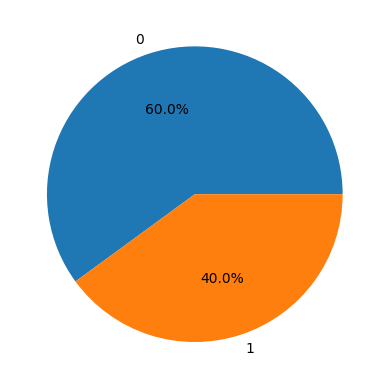

In [39]:
counts = df["is_fit"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.show()

In [40]:
from imblearn.pipeline import Pipeline   # <-- from imblearn, not sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

clf_res = Pipeline(steps=[
    ('preprocessor', preprocessor),   # your ColumnTransformer
    ('smote', SMOTE(random_state=42)), # oversampling only on train
    ('model', LogisticRegression(max_iter=1000))
])
clf_res.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'heart_rate',
                                                   'blood_pressure',
                                                   'sleep_hours',
                                                   'nutrition_quality',
                                                   'activity_index']),
                                                 ('weight',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['weight_kg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['smokes', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

##### Evaluation

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_pred = clf_res.predict(X_test)
y_proba = clf_res.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Precision: 0.7551464466812987
Recall: 0.75
F1 Score: 0.7513750604771968
ROC-AUC: 0.8275950999355255

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       235
           1       0.68      0.75      0.71       165

    accuracy                           0.75       400
   macro avg       0.74      0.75      0.75       400
weighted avg       0.76      0.75      0.75       400


Confusion Matrix:
 [[177  58]
 [ 42 123]]


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfcls = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])
rfcls.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'heart_rate',
                                                   'blood_pressure',
                                                   'sleep_hours',
                                                   'nutrition_quality',
                                                   'activity_index']),
                                                 ('weight',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['weight_kg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['smokes', 'gender'])])),
                ('rf', RandomForestClassifier())])

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_pred = rfcls.predict(X_test)
y_proba = rfcls.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7425
Precision: 0.7409007352941177
Recall: 0.7425
F1 Score: 0.7375779798800258
ROC-AUC: 0.7940296582849775

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       235
           1       0.73      0.60      0.66       165

    accuracy                           0.74       400
   macro avg       0.74      0.72      0.73       400
weighted avg       0.74      0.74      0.74       400


Confusion Matrix:
 [[198  37]
 [ 66  99]]


### GBM

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbcls = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', GradientBoostingClassifier())
])
gbcls.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'heart_rate',
                                                   'blood_pressure',
                                                   'sleep_hours',
                                                   'nutrition_quality',
                                                   'activity_index']),
                                                 ('weight',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['weight_kg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['smokes', 'gender'])])),
                ('rf', GradientBoostingClassifier())])

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_pred = gbcls.predict(X_test)
y_proba = gbcls.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.755
Precision: 0.7531363866060267
Recall: 0.755
F1 Score: 0.7531161732398786
ROC-AUC: 0.8072469374597033

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       235
           1       0.72      0.66      0.69       165

    accuracy                           0.76       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.76      0.75       400


Confusion Matrix:
 [[193  42]
 [ 56 109]]


### XGBoost

In [46]:
from xgboost import XGBClassifier

xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', XGBClassifier())
])
xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg', 'heart_rate',
                                                   'blood_pressure',
                                                   'sleep_hours',
                                                   'nutrition_quality',
                                                   'activity_index']),
                                                 ('weight',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7425
Precision: 0.7406576655052265
Recall: 0.7425
F1 Score: 0.7410047315219728
ROC-AUC: 0.7913604126370084

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       235
           1       0.70      0.65      0.68       165

    accuracy                           0.74       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.74      0.74       400


Confusion Matrix:
 [[189  46]
 [ 57 108]]


## Model Comparison

In [48]:
results = {}

models = {
    "Logistic Regression": clf,
    "LogReg + SMOTE": clf_res,
    "Random Forest": rfcls,
    "Gradient Boosting": gbcls,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "NA"
    }

metrics_df = pd.DataFrame(results).T

print(metrics_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression    0.7700   0.755245  0.654545  0.701299  0.824887
LogReg + SMOTE         0.7500   0.679558  0.745455  0.710983  0.827595
Random Forest          0.7425   0.727941  0.600000  0.657807  0.794030
Gradient Boosting      0.7550   0.721854  0.660606  0.689873  0.807247
XGBoost                0.7425   0.701299  0.654545  0.677116  0.791360
